In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree 
from six import StringIO
from IPython.display import Image

In [3]:
bankfull_df = pd.read_csv('bank-additional-full.csv', delimiter=';')
bank_df = pd.read_csv('bank-additional.csv', delimiter=';')

In [4]:
bankfull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
#replacing output of column y, response of 1 for yes and 0 for no 
bankfull_df ['y'].replace ('yes', 1, inplace = True)
bankfull_df ['y'].replace ('no', 0, inplace = True)
bank_df ['y'].replace ('yes', 1, inplace = True)
bank_df ['y'].replace ('no', 0, inplace =True)

In [8]:
#Assigning variable and splitting the data into training and test set 
feature_column = ['age', 'campaign', 'duration']
x = bankfull_df [feature_column].to_numpy()
y = bankfull_df ['y'].to_numpy()
x_train, x_test, y_train, y_test = model_selection.train_test_split (x, y, train_size = 0.8,
                                                                    random_state = 0)

In [9]:
print (x.shape, y.shape)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(41188, 3) (41188,)
(32950, 3) (32950,)
(8238, 3) (8238,)


# Logistic Regression

In [12]:
classification_model = linear_model.LogisticRegression()
classification_model.fit (x_train, y_train)
classification_model.score(x_train, y_train)

0.8923823975720789

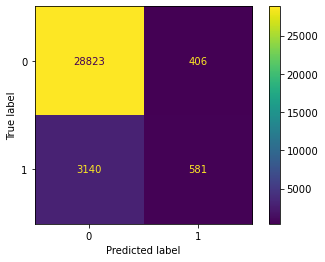

In [13]:
plot_confusion_matrix (classification_model, x_train, y_train)

# K-Nearest Neighbors Classifier

Text(0, 0.5, 'Error Mean')

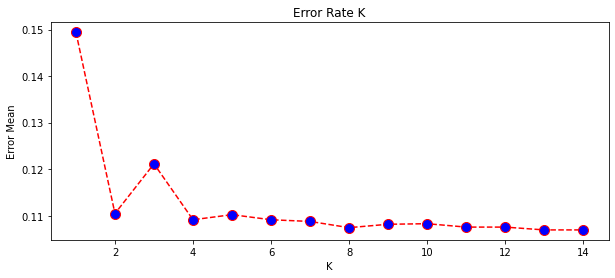

In [17]:
error = []

for i in range (1,15):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit (x_train, y_train)
    pred_i = knn.predict (x_test)
    error.append (np.mean(pred_i !=y_test))
    
plt.figure (figsize = (10,4))
plt.plot (range (1,15), error, color = 'red', linestyle = 'dashed',
          marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title ('Error Rate K')
plt.xlabel ('K')
plt.ylabel ('Error Mean')

### Analysis:             
based on the Error Rate K figure, a K-value is decided at 4 since there are no significant decrease to Error mean from 5 and below

In [18]:
#Fitting and scoring the model 
classification_model = KNeighborsClassifier (n_neighbors = 22)
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8972078907435508

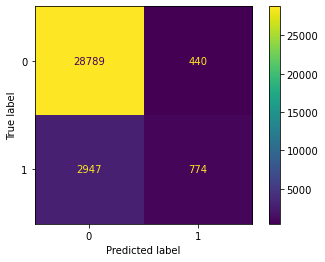

In [19]:
plot_confusion_matrix (classification_model, x_train, y_train)

# Decision Tree

In [24]:
#Fitting and scoring the model
classification_model = DecisionTreeClassifier (max_depth = 3)
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8946585735963581

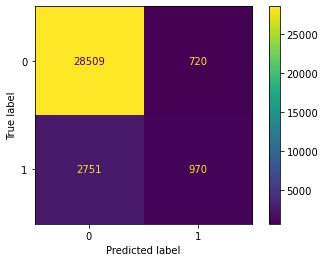

In [25]:
plot_confusion_matrix (classification_model, x_train,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

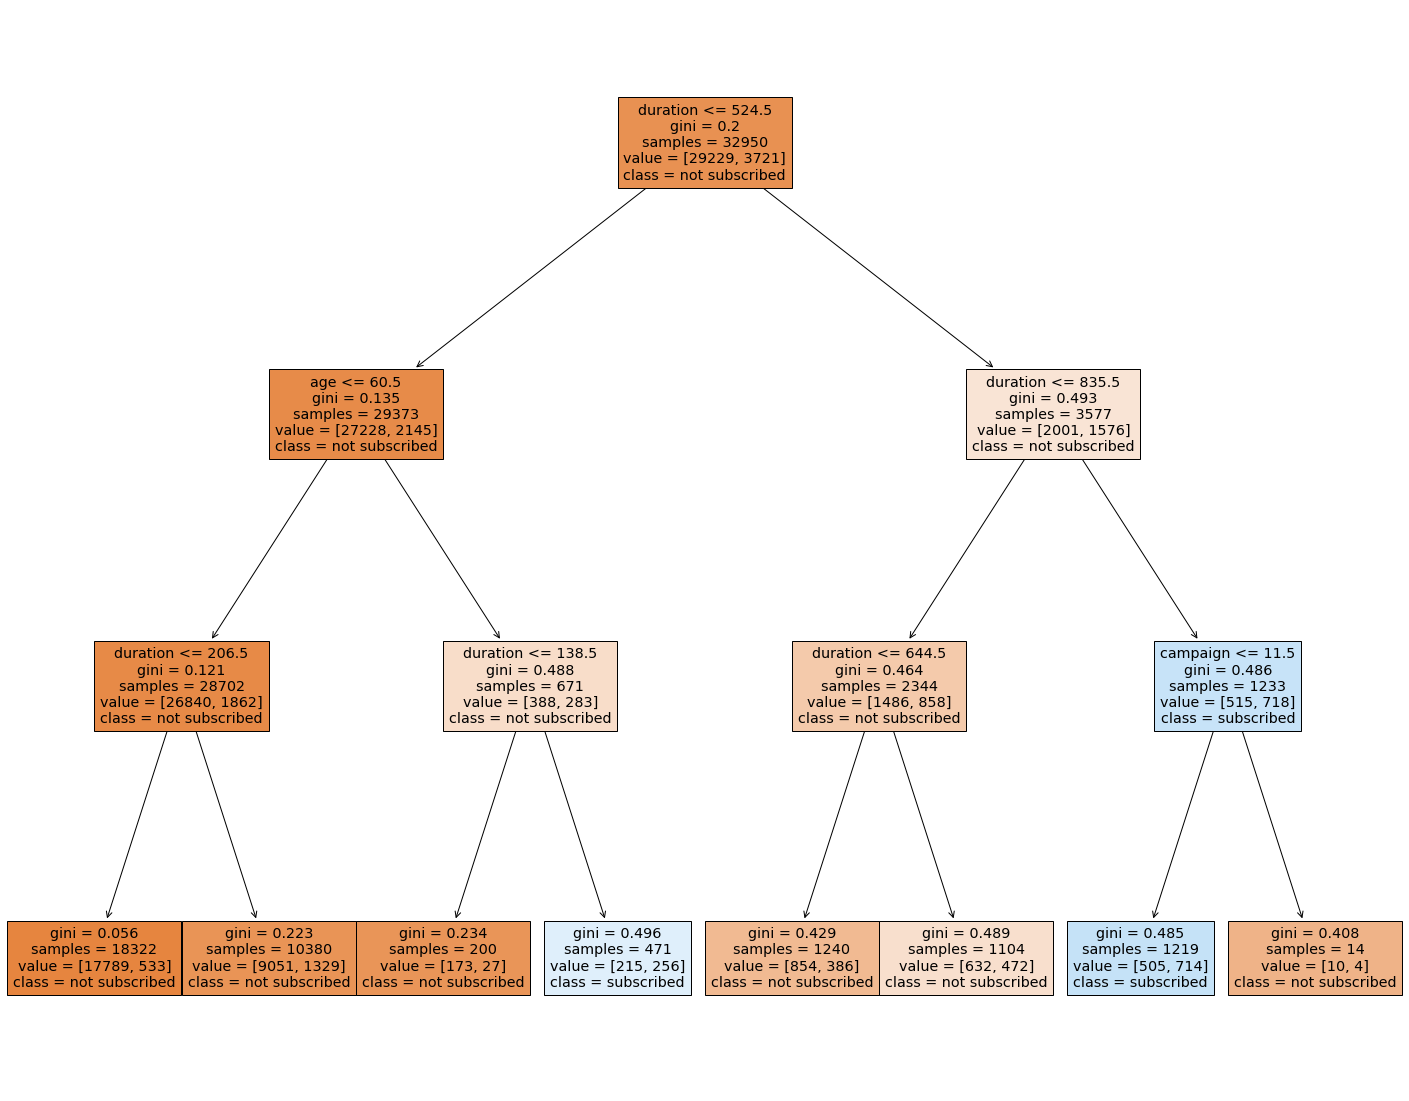

In [26]:
fig, ax = plt.subplots (figsize = (25,20))
tree.plot_tree (classification_model,ax=ax,feature_names = feature_column, class_names = ['not subscribed', 'subscribed'], filled = True)
plt.show

# Random Forest 

In [27]:
#Fitting and scoring the model
classification_model = RandomForestClassifier (max_depth = 3)
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8878603945371776

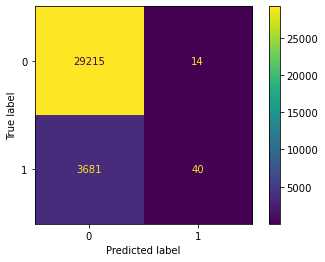

In [29]:
plot_confusion_matrix (classification_model, x_train,y_train)

# Naive Bayes

In [30]:
#Fitting and scoring the model
classification_model = GaussianNB()
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8901669195751138

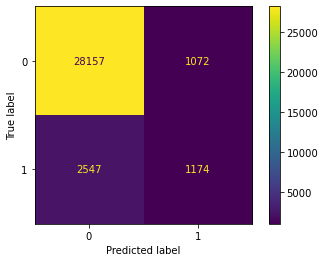

In [32]:
plot_confusion_matrix (classification_model, x_train,y_train)

# Overal Conclusion

score of various alforithm model:             
    
    - Logistic Regression = 0.8923823975720789
    - KNeighborsClassifier = 0.8972078907435508
    - Decision Tree = 0.8946585735963581
    - Random Forest = 0.8878603945371776
    - naive Bayes = 0.8901669195751138             